In [2]:
import glob
import os
import sys
import json
import pyfits

def process(path_to_fits, label):
    fits_files = glob.glob(path_to_fits + '*.fits')
    count = len(fits_files)
    print 'Total:{0} FITS files\n'.format(count)

    lc = []
    i = 0
    for fn in fits_files:
        i = i + 1
        d = {}
        if i % 100 == 0:
            print 'file No.{0} / {1}'.format(i, count)
        try:
            fits = pyfits.open(fn)
            data = fits[1].data
            header = fits[0].header

            # Barycenter corrected Julian date
            d['time'] = data.field('TIME').tolist()
            # raw flux
            d['flux'] = data.field('SAP_FLUX').tolist()
            # label
            d['label'] = label
            # name
            d['name'] = fn[len(path_to_fits):-5]

            fits.close()
            lc.append(d)      # get rid of '.fits'
        except IOError as err:
            print 'At file {0}:'.format(fn)
            print 'I/O error({0}): {1}'.format(err.errno, err.strerror)
    return lc


lc = process('./conf/q14/','conf') + process('./eb/q14/','eb') + process('./fp/q14/','fp')

Total:4 FITS files

Total:4 FITS files

Total:4 FITS files



/Users/qinqing/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


0.0204343599617
4757


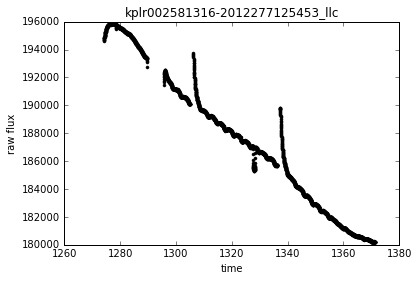

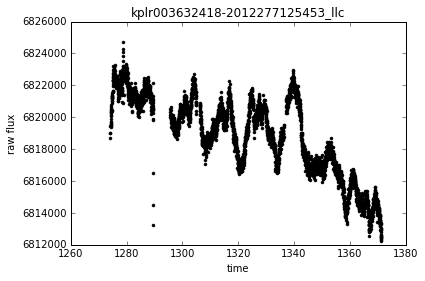

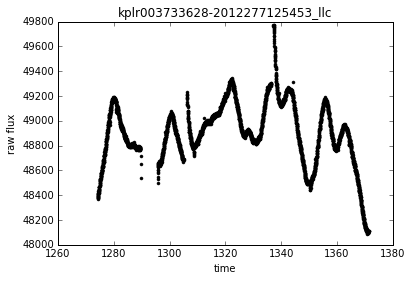

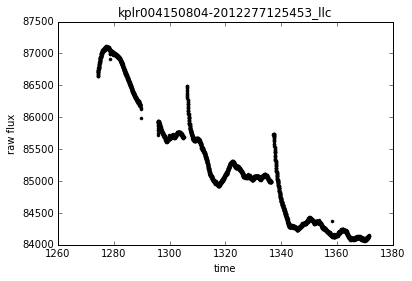

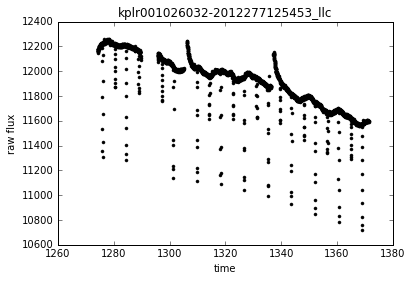

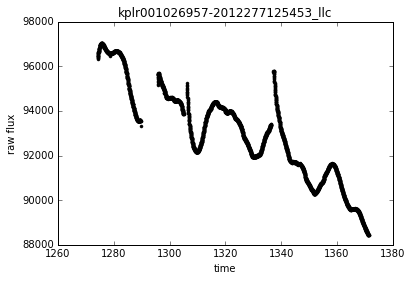

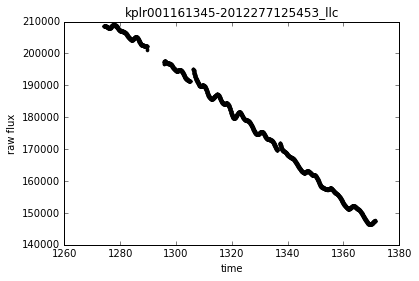

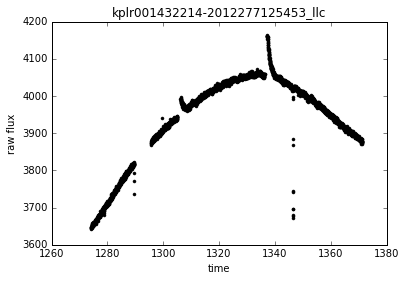

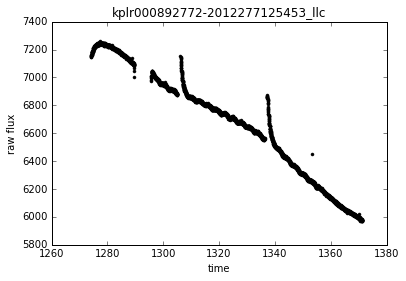

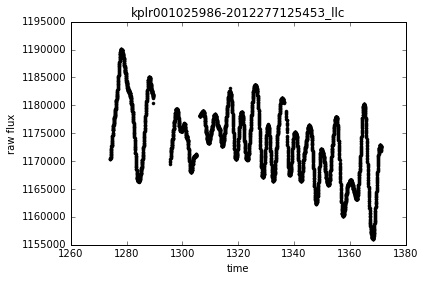

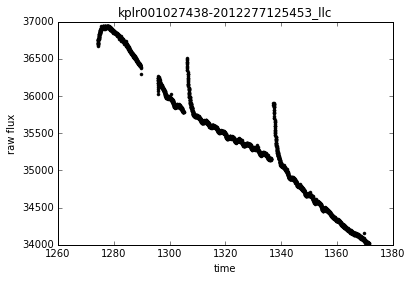

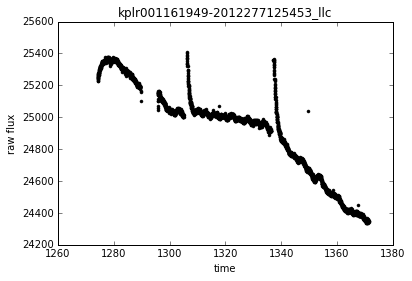

In [3]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

for x in lc:
    time = np.array(x['time'])
    raw  = np.array(x['flux'])
    plt.figure()
    plt.plot(time[~np.isnan(raw)], raw[~np.isnan(raw)], 'k.') # remove nan
    plt.title(x['name'])    # name and radius
    plt.xlabel('time')
    plt.ylabel('raw flux')
    
print time[2] - time[1]
print len(x['time'])

In [6]:
import json
with open('lightcurves-sample.json', 'w') as f:
    for x in lc:
        f.write(json.dumps(x))
        f.write('\n')

In [5]:
len(set([x['name'] for x in lc]))

12